In [5]:
from fastai.text import *

path = Path("./")

data_lm = TextLMDataBunch.from_csv(path,"lyrics-dataset.txt", text_cols="lyrics")

data_lm.save('data_lm.pkl')
data_lm = load_data(path, 'data_lm.pkl')

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, metrics=error_rate)

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


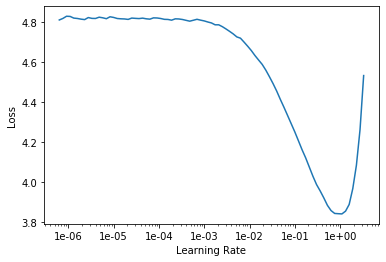

In [137]:
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(5, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,time
0,4.461126,3.680756,0.733147,00:01
1,3.779322,3.843764,0.736161,00:00
2,3.222413,3.696087,0.694531,00:00
3,2.810146,3.716588,0.698772,00:00
4,2.508656,3.695581,0.690737,00:00


In [8]:
learn.unfreeze()

In [9]:
learn.fit_one_cycle(5, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,time
0,1.632013,3.756289,0.692634,00:01
1,1.612022,3.901414,0.706920,00:01
2,1.354343,4.144596,0.712277,00:01
3,1.108765,4.219363,0.709152,00:01
4,0.919459,4.243863,0.719085,00:01


In [10]:
learn.fit_one_cycle(5, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,time
0,0.339444,4.452199,0.716741,00:01
1,0.342448,4.606980,0.721875,00:01
2,0.353078,4.549981,0.727790,00:01
3,0.311278,4.526500,0.729129,00:01
4,0.275064,4.495667,0.725446,00:01


In [11]:
predicted_lyrics = learn.predict("White wine, cocaine", n_words=200, temperature=1.1, min_p=0.001)
print(predicted_lyrics)

White wine, cocaine , need good white 
 
  < i>[lil Peep : ] < / i > 
  All this stress 
  Look at this mess 
  Look at my head , i 'm better off dead 
  Dyin ' out west 
  Tryin ' my best 
  Layin ' in bed , i was comin ' down then 
  No more pain , locked away 
  i go insane 
  i 'm so insane 
  In my brain everyday , i go insane 
  i 'm so insane 
  Leave me alone tonight , i 'm good on my own tonight 
  i 'm on the lonely road 
  i 'm just home tonight 
  i 'm good on my own tonight 
  i 'm on the road tonight 
  i 'm goin' home tonight 
  Leave me alone tonight , i 'm good on my own tonight 
  i 'm on the road tonight 
  i 'm goin' home tonight 
  Leave me alone tonight , i 'm good on my own tonight 
  i 'm on the road tonight 
  i 'm goin' home tonight 
  Leave


In [12]:
def predict(sentence, n_words=100):
    return(learn.predict(sentence, n_words=n_words, temperature=1.1))

In [13]:
sentence = "tonight"
print(predict(sentence, 400))

tonight shawty , nice 
  world have no one by my side 
  Til the reaper got ahold of me then i would take my last flight 
  Where ever did you go ? i 've been waitin ' for weeks 
  i do n't think i 'm gon na make it , please do n't take it from me 
  So it seems every time that i die , i wake up 
  When it 's time to meet my maker i 'll be ready for him xxbos I'mma take my time when i 'm in it 
  I'mma make my mind up by tonight 
  No i ca n't die with no else 
  'cause do n't born in the summer now 
  Do n't hit my stand and do n't even want to 
  Pain , pain , pain , pain whip 
  Two racks on my new shoes 
  Why the fuck do i do that 
  Two racks on some Gucci shoes 
  Why the fuck do i do that ? 
  Tell 'em why the fuck i do that 
  Who 's that ? wish you were in a room 
  Why the fuck do you do that ? 
  Tell me why the fuck do you do that 
 
  Give me a break from all this bullshit 
  Give me a break then we 'll go tired of fun 
  i can always sing this shit 
  've done myself on 

In [14]:
learn.save("/home/jupyter/projects/modeling_gustav/model/lil-peep-lyrics-model")